In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mal_data=pd.read_csv("mal_features_svm.csv")

In [3]:
mal_data.shape

(620, 25089)

In [4]:
mal_data.columns

Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       ...
       'Feature_25079', 'Feature_25080', 'Feature_25081', 'Feature_25082',
       'Feature_25083', 'Feature_25084', 'Feature_25085', 'Feature_25086',
       'Feature_25087', 'Feature_Target'],
      dtype='object', length=25089)

In [5]:
mal_data['Feature_Target'].value_counts()

1    321
0    299
Name: Feature_Target, dtype: int64

In [6]:
X = mal_data.drop(['Feature_Target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_25078,Feature_25079,Feature_25080,Feature_25081,Feature_25082,Feature_25083,Feature_25084,Feature_25085,Feature_25086,Feature_25087
0,0.686681,0.0,0.318760,0.240281,0.554595,0.0,0.0,0.0,0.0,0.170058,...,1.228569,0.119431,0.257480,0.662474,0.016617,0.191417,0.0,0.0,0.658417,0.0
1,0.684697,0.0,0.344277,0.269630,0.549066,0.0,0.0,0.0,0.0,0.205106,...,1.193470,0.086857,0.193028,0.942626,0.035129,0.148231,0.0,0.0,0.604428,0.0
2,0.612214,0.0,0.228447,0.059155,0.381893,0.0,0.0,0.0,0.0,0.220718,...,0.963619,0.000000,0.166425,1.293168,0.017087,0.025265,0.0,0.0,0.591601,0.0
3,0.700679,0.0,0.411855,0.335692,0.630833,0.0,0.0,0.0,0.0,0.189966,...,1.301663,0.140057,0.239616,0.339032,0.000000,0.172730,0.0,0.0,0.677015,0.0
4,0.682861,0.0,0.318166,0.315851,0.561206,0.0,0.0,0.0,0.0,0.196463,...,1.113997,0.052931,0.184190,1.282548,0.041094,0.084949,0.0,0.0,0.576096,0.0


In [7]:
y = mal_data['Feature_Target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Feature_Target, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [10]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (434, 25088)


The size of our testing "X" (input features) is (186, 25088)


The size of our training "y" (output feature) is (434,)


The size of our testing "y" (output features) is (186,)


In [11]:
from sklearn.svm import SVC

In [12]:
svc_model = SVC()

In [13]:
svc_model.fit(X_train, y_train)

SVC()

In [14]:
y_predict = svc_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['infected', 'uninfected'],
                         columns=['Predicted_Malaria','Predicted_Healthy'])
confusion

,Predicted_Malaria,Predicted_Healthy
infected,100,0
uninfected,0,86


<AxesSubplot:>

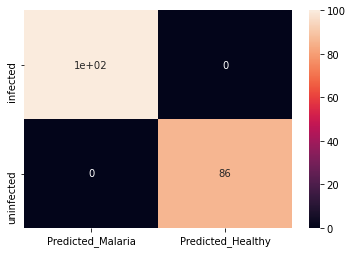

In [17]:
sns.heatmap(confusion, annot=True)

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       100

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186



In [19]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1], 
              'gamma': [0.01,],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.8s
[CV 2/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   2.6s
[CV 3/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   2.7s
[CV 4/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   2.2s
[CV 5/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.9s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [0.01], 'kernel': ['rbf']},
             verbose=3)

In [20]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       100

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186



In [21]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['infected', 'uninfected'],
                         columns=['Predicted_Malaria','Predicted_Healthy'])
confusion

,Predicted_Malaria,Predicted_Healthy
infected,100,0
uninfected,0,86


<AxesSubplot:>

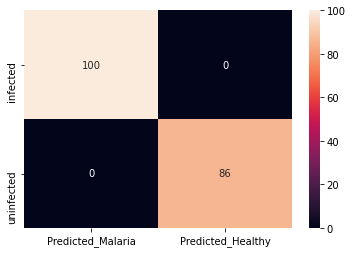

In [22]:
sns.heatmap(confusion,annot=True,fmt="d")

In [23]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.6s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.7s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.6s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.8s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.7s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.6s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.7s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.7s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   8.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.7s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.8s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   3.1s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   3.8s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   3.9s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   3.2s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.3s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.2s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.2s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.2s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.5s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.5s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.4s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 1.0
Confusion Metrix:
 [[ 86   0]
 [  0 100]]


In [25]:
cm = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_malaria', 'is_healthy'],
                         columns=['predicted_malaria','predicted_healthy'])
confusion

,predicted_malaria,predicted_healthy
is_malaria,100,0
is_healthy,0,86


<AxesSubplot:>

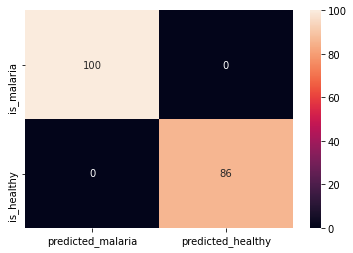

In [26]:

sns.heatmap(confusion,annot=True,fmt="d")

In [27]:
# print classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       100

    accuracy                           1.00       186
   macro avg       1.00      1.00      1.00       186
weighted avg       1.00      1.00      1.00       186

